In [19]:
import gradio as gr
import matplotlib.pyplot as plt

In [20]:
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

In [21]:
import pathlib      
dataset_url = "C:/Users/aishwarya.sonawane/Desktop/Image Classification/flower_photos"
data_dir = pathlib.Path(dataset_url)      

In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


C:\Users\aishwarya.sonawane\Desktop\Image Classification\flower_photos\roses\110472418_87b6a3aa98_m.jpg


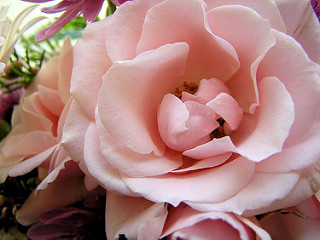

In [5]:
import PIL
roses = list(data_dir.glob('roses/*'))      # category
print(roses[4])

temp_image = PIL.Image.open(roses[15])
temp_image

C:\Users\aishwarya.sonawane\Desktop\Image Classification\flower_photos\tulips\10163955604_ae0b830975_n.jpg


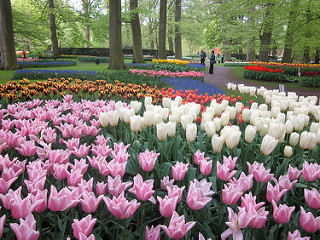

In [6]:
import PIL
tulips= list(data_dir.glob('tulips/*'))      # category
print(tulips[4])

temp_image = PIL.Image.open(tulips[30])
temp_image

In [7]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

img_height, img_width = 180, 180
train_ds = image_dataset_from_directory(data_dir, validation_split=0.2, subset="training", seed=123, image_size=(img_height, img_width), batch_size=32)
val_ds = image_dataset_from_directory(data_dir, validation_split=0.2, subset="validation", seed=123, image_size=(img_height, img_width), batch_size=32)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [8]:
import os 
from glob import glob
for i in os.listdir(dataset_url):
    new_loc = os.path.join(dataset_url,i)
    new = new_loc + '\*.jpg'
    images = glob(new)
    print(f'{i}:',len(images))

daisy: 633
dandelion: 898
LICENSE.txt: 0
roses: 641
sunflowers: 699
tulips: 799


In [9]:
class_names = train_ds.class_names
class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [10]:
len(train_ds) 

92

In [11]:
len(val_ds)

23

In [12]:
class_names = ['daisy','dandelion','roses','sunflowers','tulips']  

In [13]:
class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

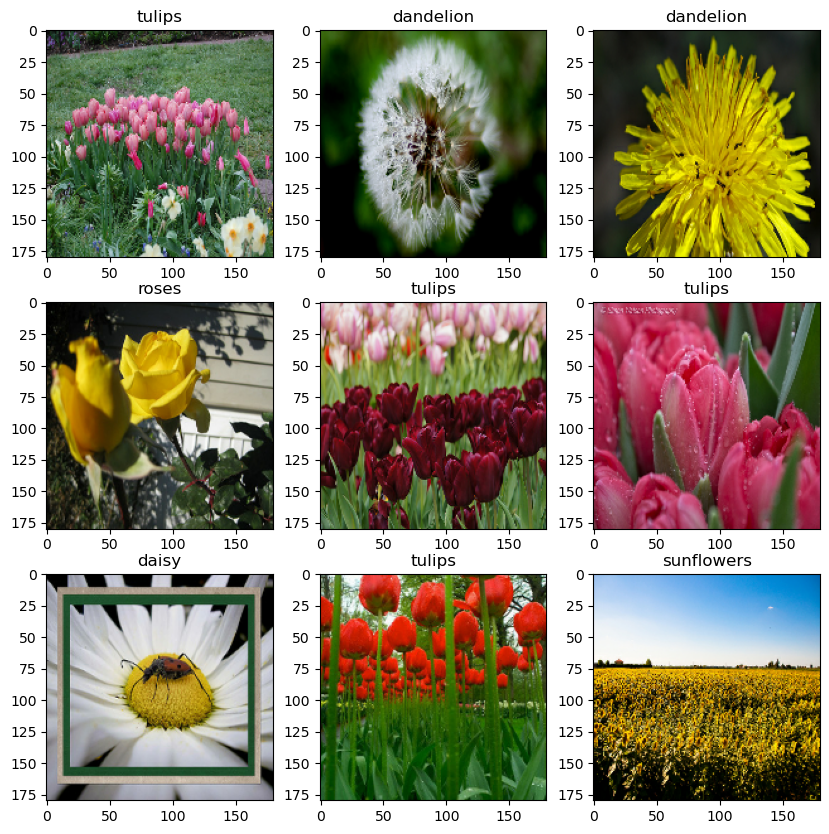

In [14]:
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(5):     
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))       # imshow works with pixeled array only
        plt.title(class_names[labels[i]])
        # plt.axis("off")

In [15]:
import tensorflow.keras as keras
import tensorflow as tf

# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from glob import glob
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.layers import Rescaling

## CNN model

In [16]:
num_classes = len(class_names)

model_cnn = Sequential([
    layers.Input(shape=(img_height, img_width, 3)),
    Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=num_classes, activation='softmax')
])

C:\Users\aishwarya.sonawane\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model_cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
history = model_cnn.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 50s 519ms/step - accuracy: 0.3725 - loss: 1.4699 - val_accuracy: 0.5586 - val_loss: 1.1229
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 50s 539ms/step - accuracy: 0.5901 - loss: 1.0382 - val_accuracy: 0.6158 - val_loss: 0.9787
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 50s 538ms/step - accuracy: 0.6622 - loss: 0.8688 - val_accuracy: 0.6226 - val_loss: 0.9569
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 64s 691ms/step - accuracy: 0.7363 - loss: 0.6941 - val_accuracy: 0.6362 - val_loss: 0.9657
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 60s 654ms/step - accuracy: 0.8287 - loss: 0.4855 - val_accuracy: 0.6485 - val_loss: 1.1220
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 56s 601ms/step - accuracy: 0.9052 - loss: 0.2978 - val_accuracy: 0.6390 - val_loss: 1.3941
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 60s 648ms/step - accuracy: 0.9375 - loss: 0.1835 - val_accuracy: 0.6431 - val_loss: 1.6168
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 55s 600ms/step - accuracy: 0.9657 - loss: 0.1017 - val_accu

## Inception V3

In [23]:
epochs= 10
from tensorflow.keras.applications import InceptionV3 # difference btw v1,v2,v3 
final_model= Sequential()

pretrained_model= InceptionV3(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
print(len(pretrained_model.layers))

for layer in pretrained_model.layers:
        layer.trainable=False
final_model.add(Rescaling(1./255,input_shape=(180,180,3)))
final_model.add(pretrained_model)
final_model.add(layers.Flatten())
final_model.add(layers.Dense(256, activation='relu'))
final_model.add(layers.Dense(128, activation='relu'))
final_model.add(layers.Dense(64, activation='relu'))
final_model.add(layers.Dense(num_classes,activation='softmax'))

312


In [24]:
final_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [25]:
final_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
 9/92 ━━━━━━━━━━━━━━━━━━━━ 1:52 1s/step - accuracy: 0.4473 - loss: 1.4543

KeyboardInterrupt: 

In [5]:
final_model.summary()

NameError: name 'final_model' is not defined

In [20]:
from sklearn.metrics import classification_report

In [21]:
val_images = []
val_labels = []

for images, labels in val_ds:
    val_images.append(images)
    val_labels.append(labels)

val_images = np.concatenate(val_images)
val_labels = np.concatenate(val_labels)


# print(val_labels)

predictions = final_model.predict(val_images)
# print(predictions)
predicted_classes = np.argmax(predictions, axis=1)

print(classification_report(val_labels, predicted_classes, target_names=class_names))


NameError: name 'final_model' is not defined

In [ ]:
from tensorflow.keras.models import load_model

final_Inception_model.save("Final_inception.keras")

# Load your models
loaded_inception = load_model("Final_inception.keras")

In [ ]:
from tensorflow.keras.preprocessing import image as keras_image
def preprocess(img_path):
    img = keras_image.load_img(img_path, target_size=(180, 180))
    img_array = keras_image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.inception_v3.preprocess_input(img_array)
    return img_array

def predict_image(img_path):
    processed_image = preprocess(img_path)
    prediction = model2.predict(processed_image)
    label = class_names[np.argmax(prediction)]
    confidence = np.max(prediction)
    return f'Prediction: {label} ({confidence:.2f})'

# Example usage
img_path = r"C:\Users\aishwarya.sonawane\Desktop\Image Classification\flower_photos\daisy\4598422221_b37313a3e3_n.jpg"
print(predict_image(img_path))

In [26]:
labels = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [27]:
def preprocess(image):
    image = image.convert('RGB')
    image = image.resize((224, 224))
    image = np.array(image)
    image = image / 255.0 # Normalize pixel values
    image = np.expand_dims(image, axis=0) # Add batch dimension
    return image

In [28]:
def predict_image(image):
    processed_image = preprocess(image)
    prediction = loaded_inception.predict(processed_image)
    label = labels[np.argmax(prediction)]
    confidence = np.max(prediction)
    return f'Prediction: {label} ({confidence:.2f})'

In [29]:
inputs = gr.Image(type='pil', label='Input Image')
outputs = gr.Textbox(label='Prediction')
interface = gr.Interface(fn=predict_image, inputs=inputs, outputs=outputs)

In [30]:
interface.launch() 

Running on local URL:  http://127.0.0.1:7865

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "C:\Users\aishwarya.sonawane\AppData\Local\anaconda3\Lib\site-packages\gradio\queueing.py", line 541, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aishwarya.sonawane\AppData\Local\anaconda3\Lib\site-packages\gradio\route_utils.py", line 276, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aishwarya.sonawane\AppData\Local\anaconda3\Lib\site-packages\gradio\blocks.py", line 1928, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aishwarya.sonawane\AppData\Local\anaconda3\Lib\site-packages\gradio\blocks.py", line 1514, in call_function
    prediction = await anyio.to_thread.run_sync(
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aishwarya.sonawane\AppData\Local\anaconda3\Lib\site-packages\anyi

----------------------------------------------------------------------------------------------------------

In [26]:
def predict_image(img):
    img_4d = img.reshape(-1, img_width, img_height, 3)      # 4D coz model trained on multiple 3Ds
    prediction = loaded_inception.predict(img_4d)[0]
    return {class_names[i]: float(prediction[i]) for i in range(num_classes)}

In [27]:
import gradio as gr

image = gr.Image(shape=(img_height, img_width))
label = gr.Label(num_top_classes=num_classes)

iface = gr.Interface(fn=predict_image, inputs=image, outputs=label, title="Flower Classification using InceptionV3")
iface.launch(debug=True)

TypeError: Image.__init__() got an unexpected keyword argument 'shape'

In [54]:
def predict_image(image):
    img = Image.fromarray(image.astype('uint8'), 'RGB')  # Convert numpy array to PIL image
    img = img.resize((img_width, img_height))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    return class_names[predicted_class_index]

# Create a Gradio interface
iface = gr.Interface(fn=predict_image, inputs=gr.Image(shape=(img_height, img_width)), outputs="label", title="Flower Classification using InceptionV3")
iface.launch(debug=True)

TypeError: Image.__init__() got an unexpected keyword argument 'shape'

In [31]:
import numpy as np
from PIL import Image

def load_image(image_path, target_size=(img_width, img_height)):
    img = Image.open(image_path)
    img = img.resize(target_size)
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def predict_image(image_path):
    img = load_image(image_path)
    predictions = model1.predict(img)[0]
    return {class_names[i]: float(predictions[i]) for i in range(num_classes)}

def test_predict_image(image_path):
    predictions = predict_image(image_path)
    print(predictions)

image_path = r"C:\Users\aishwarya.sonawane\Desktop\Image Classification\flower_photos\tulips\489506904_9b68ba211c.jpg"
image_path_2 = r"C:\Users\aishwarya.sonawane\Desktop\Image Classification\flower_photos\tulips\11746367_d23a35b085_n.jpg"
test_predict_image(image_path)
test_predict_image(image_path_2)

NameError: name 'model1' is not defined

In [38]:
import numpy as np
from PIL import Image

# Define constants
img_width, img_height = 180, 180
def load_image(image_path, target_size=(img_width, img_height)):
    img = Image.open(image_path)
    img = img.resize(target_size)
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def predict_image(model, image_path):
    img = load_image(image_path)
    predictions = model.predict(img)[0]
    top_indices = predictions.argsort()[-2:][::-1] 
    top_classes = [(class_names[i], float(predictions[i])) for i in top_indices]
    return top_classes

def test_predict_image(model, image_path):
    top_classes = predict_image(model, image_path)
    print(f'Predicted classes for {image_path}:')
    print(f'1st: {top_classes[0][0]}  Accuracy {top_classes[0][1]:.4f}')
    print(f'2nd: {top_classes[1][0]} Accuracy {top_classes[1][1]:.4f}')

image_path = r"C:\Users\aishwarya.sonawane\Desktop\Image Classification\flower_photos\daisy\1150395827_6f94a5c6e4_n.jpg"

test_predict_image(loaded_inception, image_path)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Predicted classes for C:\Users\aishwarya.sonawane\Desktop\Image Classification\flower_photos\daisy\1150395827_6f94a5c6e4_n.jpg:
1st: tulips  Accuracy 0.2609
2nd: roses Accuracy 0.2140


In [48]:
!pip install -U gradio


In [ ]:
def greet(name):
    return "Hello " + name + "!"

demo = gr.Interface(fn=greet, inputs="text", outputs="text")
demo.launch()   

In [32]:
def predict_image(img):
    img_4d = img.reshape(-1, img_width, img_height, 3)      
    prediction = loaded_inception.predict(img_4d)[0]
    return {class_names[i]: float(prediction[i]) for i in range(num_classes)}

In [33]:
def predict_image(image):
    processed_image = img.reshape(-1, img_width, img_height, 3)      
    prediction = loaded_inception.predict(processed_image)
    label = labels[np.argmax(prediction)]
    confidence = np.max(prediction)
    return f'Prediction: {label} ({confidence:.2f})'

In [34]:
def predict_image(img):
    img = Image.fromarray(img.astype('uint8'), 'RGB')  # Convert numpy array to PIL image
    img = img.resize((img_width, img_height))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    predictions = loaded_inception.predict(img_array)[0]
    return {class_names[i]: float(predictions[i]) for i in range(num_classes)}

In [35]:
inputs = gr.Image(type='pil', label='Input Image')
label = gr.Textbox(label='Prediction')
interface = gr.Interface(fn=predict_image, inputs=inputs, outputs= label)

In [36]:
interface.launch() 

Running on local URL:  http://127.0.0.1:7866

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "C:\Users\aishwarya.sonawane\AppData\Local\anaconda3\Lib\site-packages\gradio\queueing.py", line 541, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aishwarya.sonawane\AppData\Local\anaconda3\Lib\site-packages\gradio\route_utils.py", line 276, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aishwarya.sonawane\AppData\Local\anaconda3\Lib\site-packages\gradio\blocks.py", line 1928, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aishwarya.sonawane\AppData\Local\anaconda3\Lib\site-packages\gradio\blocks.py", line 1514, in call_function
    prediction = await anyio.to_thread.run_sync(
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aishwarya.sonawane\AppData\Local\anaconda3\Lib\site-packages\anyi